In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from auditory_cortex import results_dir
from utils_jgm.tikz_pgf_helpers import tpl_save
from palettable.colorbrewer import qualitative
colors = qualitative.Dark2_8.mpl_colors
from auditory_cortex.plotters.regression_weights_plotter import BetaPlotter
from auditory_cortex.neural_data import NeuralMetaData

%matplotlib inline

# def plot_shaded_line(data_dict, color, alpha=0.2, low_percentile=5, 
#     high_percentile=95, ax=None):
#     if ax is None:
#         fig, ax = plt.subplots()
#     means = []
#     x_coordinates = []
#     top_shaded = []
#     bottom_shaded = []
#     for layer_ID, layer_data in layer_spread.items():
#         layer_mean = np.mean(layer_data)
#         layer_SEM = np.std(layer_data)/np.sqrt(layer_data.size)
        
#         means.append(layer_mean)
#         top_shaded.append(layer_mean + layer_SEM)
#         bottom_shaded.append(layer_mean - layer_SEM)

#         # medians.append(np.median(layer_data))
#         # x_coordinates.append(layer_ID)
#         # percentile_95.append(np.percentile(layer_data, 95))
#         # percentile_5.append(np.percentile(layer_data, 5))
    
#     ax.plot(x_coordinates, means, color=color)
#     ax.fill_between(x=x_coordinates, y1=bottom_shaded, y2=top_shaded,
#     alpha=0.3, color=color)
    

# def save_tikz(file_name):
#     file_name = file_name+'.tex'
#     tikz_dir = os.path.join(results_dir, 'tikz_plots')
#     if not os.path.exists(tikz_dir):
#         os.makedirs(tikz_dir)
#     png_dir = os.path.join(tikz_dir, 'pngs')
#     if not os.path.exists(png_dir):
#         os.makedirs(png_dir)
#     extra_axis_parameters = {
#         'width=\\figwidth',
#         'height=\\figheight',
#         'every x tick label/.append style={rotate=90}',
#         'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
#     }
#     tpl_save(
#         filepath=os.path.join(tikz_dir, file_name),
#         extra_axis_parameters=extra_axis_parameters,
#         tex_relative_path_to_data='pngs',
#         extra_lines_start={
#             '\\providecommand{\\figwidth}{5.7in}%',
#             '\\providecommand{\\figheight}{2.0in}%',
#             '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#         },
#     )

# def rsa_plot_all_models(area='core', bin_width=20):
#     model_names = ['wav2letter_modified', 'wav2vec2',
#     'deepspeech2', 'speech2text', 'whisper_tiny', 
#     'whisper_base']

#     # bin_width = 20
#     # area = 'belt'
#     itr = 100
#     size = 499
#     identifier='global'
#     layer_wise_data = {}
#     for model_name in model_names:
        
#         rsa = RSA(model_name=model_name, identifier=identifier)

#         corr_dict = rsa.get_layer_wise_corr(
#             area=area, bin_width=bin_width, iterations=itr, size=size
#         )
        
#         layer_wise_data[model_name] = corr_dict

#     # calling the plotting function
#     for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
#         alpha = 0.2
#         color = colors[ind]
#         plot_shaded_line(layer_spread, color=color, alpha=alpha)
#         plt.title(f"RSA, {model_name}, bw-{bin_width}ms, area-{area}")
#         plt.xlabel(f"Layer IDs")
#         plt.ylabel(f"$\\rho$")
#         plt.ylim([-0.1,0.4])
#         save_tikz(f"RSA-layerwise-{area}-{model_name}")
        


INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


#### RSA plots...

In [ ]:
    model_names = ['wav2letter_modified', 'wav2vec2',
    'deepspeech2', 'speech2text', 'whisper_tiny', 
    'whisper_base']

    # bin_width = 20
    # area = 'belt'
    itr = 100
    size = 499
    identifier='global'

    colors = qualitative.Dark2_8.mpl_colors

In [ ]:
from auditory_cortex.plotters.rsa_plotter import RSA_plot_layer_wise

RSA_plot_layer_wise()

In [ ]:
rsa_plot_all_models(area='core')

In [ ]:
model_names = ['wav2letter_modified',
                # 'wav2vec2', 'deepspeech2', 'speech2text',
                # 'whisper_tiny', 'whisper_base'
            ]

bin_width = 20
# area = 'belt'
itr = 100
size = 499
identifier='global'
layer_wise_data = {}
for model_name in model_names:
    
    rsa = RSA(model_name=model_name, identifier=identifier)

    corr_dict = rsa.get_layer_wise_corr(
        area=area, bin_width=bin_width, iterations=itr, size=size
    )
    
    layer_wise_data[model_name] = corr_dict
        


In [ ]:
for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
    alpha = 0.2
    color = colors[ind]
    plot_shaded_line(layer_spread, color=color, alpha=alpha)
    plt.title(f"RSA, {model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([-0.1,0.4])
    save_tikz(f"RSA-layerwise-{area}-{model_name}")

### Beta Matrices

In [7]:
tikz_dir = os.path.dir(results_dir, '')

In [2]:
mdata = NeuralMetaData()
core_sessions = mdata.get_all_sessions('core')
belt_sessions = mdata.get_all_sessions('belt')

core_belt_ordered_sessions = np.concatenate([core_sessions, belt_sessions])


In [3]:
model_names = ['wav2letter_modified', 'wav2vec2',
'deepspeech2', 'speech2text',
# 'whisper_tiny', 'whisper_base'
]

peak_layers = [6, 7, 3, 2,
                # 2, 3
                ]

In [5]:
for i in range(len(model_names)):
    layer = peak_layers[i] 
    model_name = model_names[i]
    plotter = BetaPlotter(model_name=model_name)
    plotter.plot_confusion_matrix(layer=layer, bboxes_labels='areas',
    ordered_sessions_list = core_belt_ordered_sessions)

    plt.xticks([])
    plt.yticks([])
    
    # save_tikz(f"beta-matrix-{model_name}-layer-{layer}")

NameError: name 'model_names' is not defined

Loading file...


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x2ae12e8a6c70>


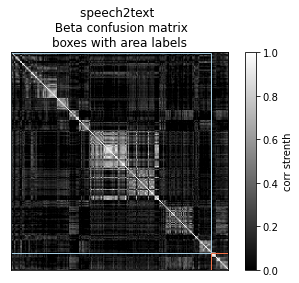

In [15]:
i = 3
model_name = model_names[i]
layer = peak_layers[i]
plotter = BetaPlotter(model_name=model_name)
plotter.plot_confusion_matrix(layer=layer, bboxes_labels='areas',
ordered_sessions_list = core_belt_ordered_sessions)

plt.xticks([])
plt.yticks([])
# save_tikz(f"beta-matrix-{model_name}-layer-{layer}")
filepath = os.path.join(results_dir, 'tikz_plots', f"beta-matrix-{model_name}-layer-{layer}.jpg")
plt.savefig(filepath)

Loading file...


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x2ae134554df0>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x2ae134545a60> <matplotlib.colors.Normalize object at 0x2ae134545a60>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x2ae134554df0>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x2ae134545a60> <matplotlib.colors.Normalize object at 0x2ae134545a60>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x2ae134554df0>


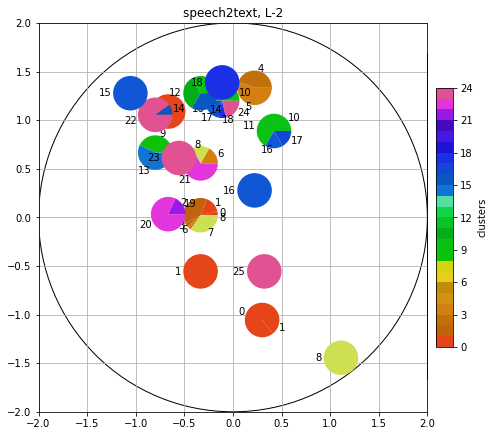

In [16]:
# plotter.plot_topographical_pie_chart(layer=layer,
#     ordered_sessions_list = core_belt_ordered_sessions)
# for i in range(len(model_names)):

# i = 0
model_name = model_names[i]
layer = peak_layers[i]
plotter = BetaPlotter(model_name=model_name)

figsize=6
mini_plot_width = 0.1
fig, ax=plt.subplots(figsize=(figsize,figsize))
out = plotter.plot_topographical_pie_chart(layer=layer,
                                    ax=ax,
                                    ordered_sessions_list = core_belt_ordered_sessions,
                                    mini_titles=False,
                                    mini_plot_size=(mini_plot_width,mini_plot_width),
                                    analysis_criteria='session-wise'
                                    )
# save_tikz(f"topographical-pie-chart-{model_name}-layer-{layer}")

ax.set_xticks([])
ax.set_yticks([])
filepath = os.path.join(results_dir, 'tikz_plots', f"topographical-pie-chart-{model_name}-layer-{layer}.jpg")
plt.savefig(filepath)